<a href="https://colab.research.google.com/github/rahiakela/machine-learning-research-and-practice/blob/main/grokking-machine-learning/05-perceptron-algorithm/01_perceptron_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Perceptron algorithm

Let's develop the perceptron algorithm for our sentiment analysis application.

First we’ll write the code from scratch to fit our original dataset,
and then we’ll use Turi Create. 

In real life, we always use a package and have little need to code our
own algorithms.

##Setup

In [ ]:
!pip -q install turicreate

In [4]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as pyplot

import turicreate as tc

random.seed(0)

In [5]:
# Some functions to plot our points and draw the lines
def plot_points(features, labels):
    X = np.array(features)
    y = np.array(labels)
    spam = X[np.argwhere(y==1)]
    ham = X[np.argwhere(y==0)]
    pyplot.scatter([s[0][0] for s in spam],
                   [s[0][1] for s in spam],
                   s = 100,
                   color = 'cyan',
                   edgecolor = 'k',
                   marker = '^')
    pyplot.scatter([s[0][0] for s in ham],
                   [s[0][1] for s in ham],
                   s = 100,
                   color = 'red',
                   edgecolor = 'k',
                   marker = 's')
    pyplot.xlabel('aack')
    pyplot.ylabel('beep')
    pyplot.legend(['happy','sad'])
    
def draw_line(a,b,c, starting=0, ending=3, **kwargs):
    # Plotting the line ax + by + c = 0
    x = np.linspace(starting, ending, 1000)
    pyplot.plot(x, -c/b - a*x/b, **kwargs)

##Defining dataset

Let’s begin by defining our dataset as a NumPy array. The features correspond to two numbers
corresponding to the appearances of aack and beep. 

The labels are 1 for the happy sentences and
0 for the sad ones.

In [6]:
features = np.array([[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[2,3],[3,2]])
labels = np.array([0,0,0,0,1,1,1,1])

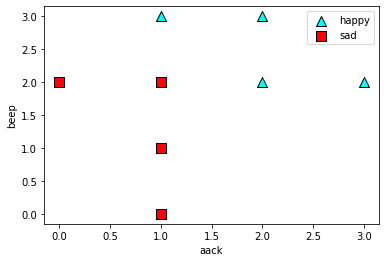

In [7]:
# Plotting the points
plot_points(features, labels)

##Perceptron trick

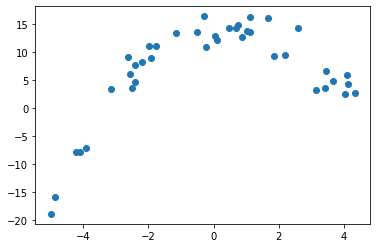

In [ ]:
plt.scatter(X, Y)

In [ ]:
data = tc.SFrame({"x": X, "y": Y})
data.print_rows(5, 2)

+----------------------+--------------------+
|          x           |         y          |
+----------------------+--------------------+
|  3.4442185152504816  | 6.685961311021467  |
| -2.4108324970703663  | 4.690236225597948  |
| 0.11274721368608542  | 12.205789026637378 |
| -1.9668727392107255  | 11.133217991032268 |
| -0.23403045847644144 | 10.927272159051856 |
+----------------------+--------------------+
[40 rows x 2 columns]



The way to do polynomial regression in Turi Create is to add many columns to our dataset, corresponding
to the powers of the main feature, and to apply linear regression to this expanded
dataset. 

If the main feature is, say, $x$, then we add columns with the values of $x^2, x^3, x^4$, and so on.
Thus, our model is finding linear combinations of the powers of $x$, which are precisely polynomials
in $x$.

So, let's add columns to our dataset corresponding to $X^2, X^3,...,x^{200}$.

In [ ]:
for i in range(2, 200):
  strings = "x^" + str(i)
  data[strings] = data["x"].apply(lambda x: x ** i)

In [ ]:
data.print_rows(5, 5)

+----------------------+--------------------+----------------------+
|          x           |         y          |         x^2          |
+----------------------+--------------------+----------------------+
|  3.4442185152504816  | 6.685961311021467  |  11.862641180794233  |
| -2.4108324970703663  | 4.690236225597948  |  5.812113328930538   |
| 0.11274721368608542  | 12.205789026637378 | 0.012711934193975809 |
| -1.9668727392107255  | 11.133217991032268 |  3.8685883722503025  |
| -0.23403045847644144 | 10.927272159051856 | 0.05477025549469338  |
+----------------------+--------------------+----------------------+
+-----------------------+------------------------+-----+
|          x^3          |          x^4           | ... |
+-----------------------+------------------------+-----+
|   40.85752839466433   |   140.72225578427518   | ... |
|  -14.012031690041567  |   33.78066134833202    | ... |
| 0.0014332351609316464 | 0.00016159327095197139 | ... |
|   -7.609021008606714  |   14.965975

Before we train any models, we need to split the data into training and testing datasets.

In [ ]:
train, test = data.random_split(.8)

##Regularization

The way to use regularization in Turi Create is simple: all we need to do is specify the parameters
`l1_penalty` and `l2_penalty` in the create method when we train the model. This penalty
is precisely the regularization parameter.

A penalty of 0 means we are not using regularization.
Thus, we will train three different models.

In [ ]:
model_no_reg = tc.linear_regression.create(train, target="y", l1_penalty=0.0, l2_penalty=0.0, verbose=False, validation_set=None)

Training error (rmse): 7.628927681782485
Testing error (rmse): 300.42447284089394


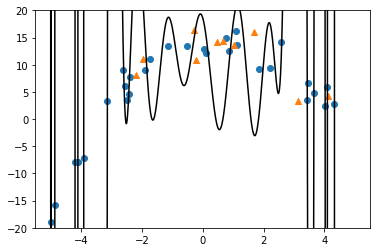

Polynomial coefficients
+-------------+---------------------+
|     name    |        value        |
+-------------+---------------------+
| (intercept) |  18.623138189315796 |
|      x      | -18.598556902940658 |
|     x^2     | -119.19007455875494 |
|     x^3     |  48.516545255041216 |
|     x^4     |  282.7482723483999  |
|     x^5     |  -49.95491582420522 |
|     x^6     | -250.90926024895236 |
|     x^7     |  28.199402528231605 |
|     x^8     |  108.14204863274358 |
|     x^9     |  -9.362222881794056 |
+-------------+---------------------+
[200 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.


In [ ]:
display_results(model_no_reg)

Notice that the model with no regularization fits the training points really well, but it’s chaotic
and doesn’t fit the testing points well.

Training error (rmse): 8.699762812374527
Testing error (rmse): 11.423535163527724


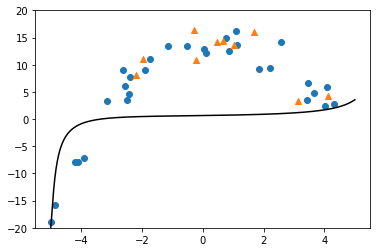

Polynomial coefficients
+-------------+-------------------------+
|     name    |          value          |
+-------------+-------------------------+
| (intercept) |    0.6498528837303585   |
|      x      |    0.078577134668393    |
|     x^2     |   0.007954361728349516  |
|     x^3     |   0.005192477583078422  |
|     x^4     | -0.00027031270070101206 |
|     x^5     |  0.00024430879357542303 |
|     x^6     | -2.2755346195606828e-05 |
|     x^7     |  9.785636141866648e-06  |
|     x^8     | -1.1197004341522253e-06 |
|     x^9     |  3.6541090515082453e-07 |
+-------------+-------------------------+
[200 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.


In [ ]:
model_l1_reg  = tc.linear_regression.create(train, target="y", l1_penalty=0.1, l2_penalty=0.0, verbose=False, validation_set=None)
display_results(model_l1_reg)

The model with L1 regularization does OK with both the
training and the testing sets.

Training error (rmse): 1.7570115260649124
Testing error (rmse): 2.2823160671100804


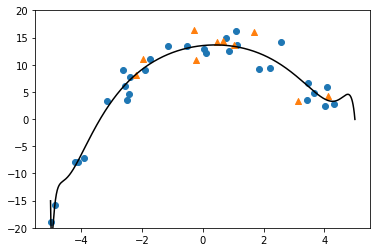

Polynomial coefficients
+-------------+-------------------------+
|     name    |          value          |
+-------------+-------------------------+
| (intercept) |    13.523593494845487   |
|      x      |    0.5686987719693142   |
|     x^2     |   -0.6956663947999977   |
|     x^3     |    0.0199946269133012   |
|     x^4     |   -0.01814361481033296  |
|     x^5     |  0.0007065714461343759  |
|     x^6     | -0.00021023490481392182 |
|     x^7     |  3.521304155131599e-05  |
|     x^8     |  5.804305180157492e-06  |
|     x^9     |  1.2555018061086293e-06 |
+-------------+-------------------------+
[200 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.


In [ ]:
model_l2_reg  = tc.linear_regression.create(train, target="y", l1_penalty=0.0, l2_penalty=0.1, verbose=False, validation_set=None)
display_results(model_l2_reg)

But the model with L2 regularization does a wonderful job with
both the training and the testing sets and also seems to be the one that really captures the shape
of the data.


Also note that for the three models, the boundary curve goes a bit crazy on the end points.
This is completely understandable, because the endpoints have less data, and it is natural for the
model to not know what to do when there’s no data.

Let's test the model.



In [ ]:
predictions = test["x", "y"]

predictions["No reg"] = model_no_reg.predict(test)
predictions["L1 reg"] = model_l1_reg.predict(test)
predictions["L2 reg"] = model_l2_reg.predict(test)

predictions

x,y,No reg,L1 reg,L2 reg
-1.9668727392107255,11.133217991032268,22.037007916915172,0.4724083533318242,9.254365494175333
-0.23403045847644144,10.927272159051856,16.667740657193615,0.6318315600830796,13.35208758628001
-2.1816215560029617,8.16012255928749,32.29968964446016,0.4382056344993157,8.290426318451088
-0.2785728454728664,16.36505651355184,15.175456823147723,0.6284664078375581,13.31064098145711
4.130110532378982,4.299534274468492,856.6608556406572,1.817306988356443,3.3926033167939096
1.6815320123185087,16.070558182542374,-2.890549544349369,0.8301058381909745,12.469559362979002
0.6751074062067186,14.272553413210698,0.39566406849439417,0.7081004843714227,13.592927415083706
0.4744091132842376,14.257854146830486,-1.179096873958697,0.689467215990742,13.638050530027567
3.14466863291336,3.2664703661537313,420.9688750784844,1.1926114976948787,7.579786621109391
1.0318562796138302,13.67662422703284,18.88691912920001,0.745070175549383,13.371738950275772


The model with no regularization had a really large RMSE! Among the other two models, the
one with L2 regularization performed much better. 

Here are two questions to think about:

* Why did the model with L2 regularization perform better than the one with L1
regularization?
* Why does the model with L1 regularization look flat, whereas the model with L2 regularization managed to capture the shape of the data?

The two questions have a similar answer, and to find it, we can look at the coefficients of the
polynomials.

In [ ]:
model_no_reg.coefficients

name,index,value,stderr
(intercept),None,18.623138189315796,None
x,None,-18.598556902940658,None
x^2,None,-119.19007455875494,None
x^3,None,48.516545255041216,None
x^4,None,282.7482723483999,None
x^5,None,-49.95491582420522,None
x^6,None,-250.90926024895236,None
x^7,None,28.199402528231605,None
x^8,None,108.14204863274358,None
x^9,None,-9.362222881794056,None


In [ ]:
model_l1_reg.coefficients

name,index,value,stderr
(intercept),None,0.6498528837303585,None
x,None,0.078577134668393,None
x^2,None,0.007954361728349516,None
x^3,None,0.005192477583078422,None
x^4,None,-0.00027031270070101206,None
x^5,None,0.00024430879357542303,None
x^6,None,-2.2755346195606828e-05,None
x^7,None,9.785636141866648e-06,None
x^8,None,-1.1197004341522253e-06,None
x^9,None,3.6541090515082453e-07,None


In [ ]:
model_l2_reg.coefficients

name,index,value,stderr
(intercept),None,13.523593494845487,None
x,None,0.5686987719693142,None
x^2,None,-0.6956663947999977,None
x^3,None,0.0199946269133012,None
x^4,None,-0.01814361481033296,None
x^5,None,0.0007065714461343759,None
x^6,None,-0.00021023490481392182,None
x^7,None,3.521304155131599e-05,None
x^8,None,5.804305180157492e-06,None
x^9,None,1.2555018061086293e-06,None


From these polynomials, we see the following:

* For the model with no regularization, all the coefficients are large. This means the polynomial is chaotic and not good for making predictions.
* For the model with `L1` regularization, all the coefficients, except for the constant one (the first one), are tiny—almost 0. This means that for the values close to zero, the polynomial looks a lot like the horizontal line with equation `yˆ = 0.57`. This is better than the previous model but still not great for making predictions.
* For the model with `L2` regularization, the coefficients get smaller as the degree grows but are still not so small. This gives us a decent polynomial for making predictions.